In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
model_utilities_PUMS_path = r"D:\Data\Download\python_projects\tableak_adult_gen\all_exp_result\model_utilities_PUMS.csv"
model_utilities_qat_PUMS_path = r"D:\Data\Download\python_projects\tableak_adult_gen\all_exp_result\model_utilities_qat_PUMS.csv"

model_utilities_qat_path = r"D:\Data\Download\python_projects\tableak_adult_gen\all_exp_result\model_utilities_qat.csv"
model_utilities_regular_path = r"D:\Data\Download\python_projects\tableak_adult_gen\all_exp_result\model_utilities_regular.csv"

model_utilities_PUMS = pd.read_csv(model_utilities_PUMS_path).drop(columns=['Unnamed: 0'])
model_utilities_qat_PUMS = pd.read_csv(model_utilities_qat_PUMS_path).drop(columns=['Unnamed: 0'])
model_utilities_regular = pd.read_csv(model_utilities_regular_path)
model_utilities_qat = pd.read_csv(model_utilities_qat_path)

model_utilities_regular.head()

,TPR,F1 Score,Loss,Accuracy,data size,model_type,dataset,model
0,0.8613,0.797118,0.474756,0.8613,10000,normal,dia_inde,client0
1,0.8613,0.797118,0.479295,0.8613,10000,normal,dia_inde,client1
2,0.8613,0.797118,0.476432,0.8613,10000,normal,dia_inde,client2
3,0.8613,0.797118,0.477994,0.8613,10000,normal,dia_inde,client3
4,0.8613,0.797118,0.470700,0.8613,10000,normal,dia_inde,client4


In [3]:
pd.unique(model_utilities_regular["model_type"])

array(['normal', 'dp', 'fairDp', 'fair'], dtype=object)

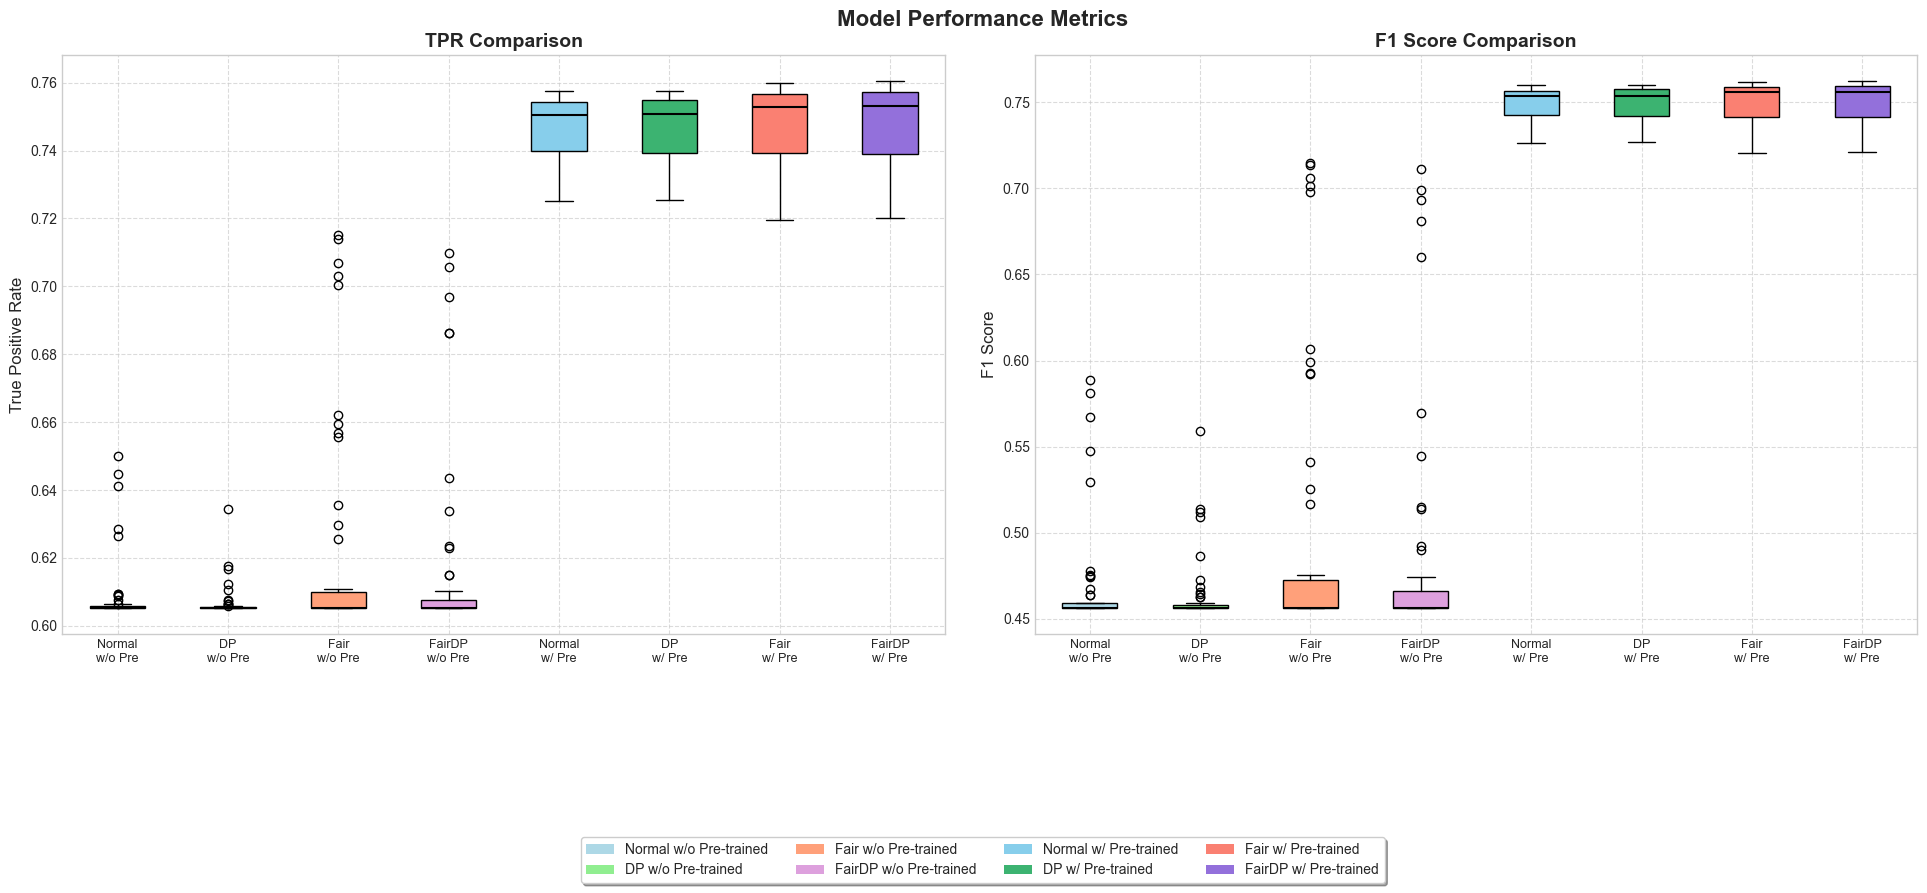

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

without_df = model_utilities_PUMS[model_utilities_PUMS["pre_trained_model"]=="without_pre_trained"]
with_df = model_utilities_PUMS[model_utilities_PUMS["pre_trained_model"]=="with_pre_trained"]

without_normal_tpr = without_df[without_df["model_type"] == "normal"]["TPR"].tolist()
without_dp_tpr = without_df[without_df["model_type"] == "dp"]["TPR"].tolist()
without_fair_tpr = without_df[without_df["model_type"] == "fair"]["TPR"].tolist()
without_fairdp_tpr = without_df[without_df["model_type"] == "fairDp"]["TPR"].tolist()

without_normal_f1 = without_df[without_df["model_type"] == "normal"]["F1 Score"].tolist()
without_dp_f1 = without_df[without_df["model_type"] == "dp"]["F1 Score"].tolist()
without_fair_f1 = without_df[without_df["model_type"] == "fair"]["F1 Score"].tolist()
without_fairdp_f1 = without_df[without_df["model_type"] == "fairDp"]["F1 Score"].tolist()

with_normal_tpr = with_df[with_df["model_type"] == "normal"]["TPR"].tolist()
with_dp_tpr = with_df[with_df["model_type"] == "dp"]["TPR"].tolist()
with_fair_tpr = with_df[with_df["model_type"] == "fair"]["TPR"].tolist()
with_fairdp_tpr = with_df[with_df["model_type"] == "fairDp"]["TPR"].tolist()

with_normal_f1 = with_df[with_df["model_type"] == "normal"]["F1 Score"].tolist()
with_dp_f1 = with_df[with_df["model_type"] == "dp"]["F1 Score"].tolist()
with_fair_f1 = with_df[with_df["model_type"] == "fair"]["F1 Score"].tolist()
with_fairdp_f1 = with_df[with_df["model_type"] == "fairDp"]["F1 Score"].tolist()

plt.style.use('seaborn-v0_8-whitegrid')
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(20, 8))
fig.tight_layout(pad=4.0)

tpr_data = [without_normal_tpr, without_dp_tpr, without_fair_tpr, without_fairdp_tpr,
            with_normal_tpr, with_dp_tpr, with_fair_tpr, with_fairdp_tpr]
            
box = ax1.boxplot(tpr_data, patch_artist=True, 
           medianprops=dict(color='black', linewidth=1.5))

colors = ['lightblue', 'lightgreen', 'lightsalmon', 'plum', 
          'skyblue', 'mediumseagreen', 'salmon', 'mediumpurple']

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax1.set_xticklabels(["Normal\nw/o Pre", "DP\nw/o Pre", "Fair\nw/o Pre", "FairDP\nw/o Pre",
                     "Normal\nw/ Pre", "DP\nw/ Pre", "Fair\nw/ Pre", "FairDP\nw/ Pre"], 
                     fontsize=9, rotation=0)
ax1.set_title("TPR Comparison", fontsize=14, fontweight='bold')
ax1.set_ylabel("True Positive Rate", fontsize=12)
ax1.grid(True, linestyle='--', alpha=0.7)

f1_data = [without_normal_f1, without_dp_f1, without_fair_f1, without_fairdp_f1,
           with_normal_f1, with_dp_f1, with_fair_f1, with_fairdp_f1]
           
box = ax2.boxplot(f1_data, patch_artist=True,
           medianprops=dict(color='black', linewidth=1.5))

for patch, color in zip(box['boxes'], colors):
    patch.set_facecolor(color)

ax2.set_xticklabels(["Normal\nw/o Pre", "DP\nw/o Pre", "Fair\nw/o Pre", "FairDP\nw/o Pre",
                     "Normal\nw/ Pre", "DP\nw/ Pre", "Fair\nw/ Pre", "FairDP\nw/ Pre"], 
                     fontsize=9, rotation=0)
ax2.set_title("F1 Score Comparison", fontsize=14, fontweight='bold')
ax2.set_ylabel("F1 Score", fontsize=12)
ax2.grid(True, linestyle='--', alpha=0.7)

model_types = ['Normal', 'DP', 'Fair', 'FairDP']
pretrained = ['w/o Pre-trained', 'w/ Pre-trained']
handles = [plt.Rectangle((0,0),1,1, facecolor=colors[i]) for i in range(8)]
labels = [f"{model} {pre}" for model in model_types for pre in pretrained[:1]] + \
         [f"{model} {pre}" for model in model_types for pre in pretrained[1:]]

fig.legend(handles, labels, loc='lower center', bbox_to_anchor=(0.5, -0.12), 
           ncol=4, frameon=True, fancybox=True, shadow=True)

plt.suptitle("Model Performance Metrics", fontsize=16, fontweight='bold')
plt.subplots_adjust(bottom=0.2)
plt.show()

In [5]:
# fairness_scores_df.head()

In [13]:
# fairness_scores_df[fairness_scores_df["data_type"]=="subgroup"]


In [14]:


def create_dataset_plots(dataset_name):
    df = pd.read_csv(r"D:\data\Download\python_projects\tableak_adult_gen\all_exp_result\fairness_scores.csv")
    dataset_df = df[df['dataset'] == dataset_name]
    
    group_df = dataset_df[dataset_df['data_type'] == 'group']
    subgroup_df = dataset_df[dataset_df['data_type'] == 'subgroup']
    
    # Check if all model types exist in the dataset
    available_model_types = dataset_df['model_type'].unique()
    model_types = [mt for mt in ['normal', 'dp', 'fair', 'fairDp'] if mt in available_model_types]
    group_splits = group_df['split'].unique()
    subgroup_splits = subgroup_df['split'].unique()
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    
    bar_height = 0.15
    
    # Group TPR plot (top left)
    y_position_offset = np.linspace(-(len(model_types)-1)/2*bar_height, (len(model_types)-1)/2*bar_height, len(model_types))
    
    tpr_by_split_model = {}
    for split in group_splits:
        tpr_by_split_model[split] = []
        for model_type in model_types:
            tpr_values = group_df[(group_df['split'] == split) & (group_df['model_type'] == model_type)]['tpr']
            tpr_by_split_model[split].append(tpr_values.mean() if len(tpr_values) > 0 else 0)
    
    avg_tpr_by_split = {split: np.mean(values) for split, values in tpr_by_split_model.items()}
    sorted_splits = sorted(group_splits, key=lambda x: avg_tpr_by_split[x], reverse=True)
    
    colors = plt.cm.tab10(np.linspace(0, 0.8, len(model_types)))
    
    for i, model_type in enumerate(model_types):
        y_positions = np.arange(len(sorted_splits)) + y_position_offset[i]
        values = [group_df[(group_df['split'] == split) & (group_df['model_type'] == model_type)]['tpr'].mean() 
                 for split in sorted_splits]
        
        bars = axs[0, 0].barh(y_positions, values, height=bar_height, color=colors[i], label=model_type)
        
        for j, value in enumerate(values):
            # Display all values
                axs[0, 0].text(value + 0.01, y_positions[j], f"{value:.4f}", va='center', fontsize=7)
    
    axs[0, 0].set_yticks(np.arange(len(sorted_splits)))
    axs[0, 0].set_yticklabels(sorted_splits)
    axs[0, 0].set_xlabel('TPR', fontsize=10)
    axs[0, 0].set_title(f'TPR by Group', fontsize=12)
    axs[0, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[0, 0].set_xlim(0, 1.05)
    axs[0, 0].tick_params(axis='both', which='major', labelsize=9)
    axs[0, 0].legend(title="Model Type", fontsize=8)
    
    # Group Fairness Score plot (top right)
    fairness_by_split_model = {}
    for split in group_splits:
        fairness_by_split_model[split] = []
        for model_type in model_types:
            fair_values = group_df[(group_df['split'] == split) & (group_df['model_type'] == model_type)]['fairness_score']
            fairness_by_split_model[split].append(fair_values.mean() if len(fair_values) > 0 else 0)
    
    avg_fair_by_split = {split: np.mean(values) for split, values in fairness_by_split_model.items()}
    sorted_splits = sorted(group_splits, key=lambda x: avg_fair_by_split[x], reverse=True)
    
    for i, model_type in enumerate(model_types):
        y_positions = np.arange(len(sorted_splits)) + y_position_offset[i]
        values = [group_df[(group_df['split'] == split) & (group_df['model_type'] == model_type)]['fairness_score'].mean() 
                 for split in sorted_splits]
        
        bars = axs[0, 1].barh(y_positions, values, height=bar_height, color=colors[i], label=model_type)
        
        for j, value in enumerate(values):
            # Display all values
                axs[0, 1].text(value + 0.01, y_positions[j], f"{value:.4f}", va='center', fontsize=7)
    
    axs[0, 1].set_yticks(np.arange(len(sorted_splits)))
    axs[0, 1].set_yticklabels(sorted_splits)
    axs[0, 1].set_xlabel('Fairness Score', fontsize=10)
    axs[0, 1].set_title(f'Fairness Score by Group', fontsize=12)
    axs[0, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[0, 1].tick_params(axis='both', which='major', labelsize=9)
    
    max_fair = max([max(values) for values in fairness_by_split_model.values()]) * 1.1
    axs[0, 1].set_xlim(0, max_fair)
    axs[0, 1].legend(title="Model Type", fontsize=8)
    
    # Subgroup TPR plot (bottom left)
    tpr_by_split_model = {}
    for split in subgroup_splits:
        tpr_by_split_model[split] = []
        for model_type in model_types:
            tpr_values = subgroup_df[(subgroup_df['split'] == split) & (subgroup_df['model_type'] == model_type)]['tpr']
            tpr_by_split_model[split].append(tpr_values.mean() if len(tpr_values) > 0 else 0)
    
    avg_tpr_by_split = {split: np.mean(values) for split, values in tpr_by_split_model.items()}
    sorted_splits = sorted(subgroup_splits, key=lambda x: avg_tpr_by_split[x], reverse=True)
    
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(model_types)))
    
    for i, model_type in enumerate(model_types):
        y_positions = np.arange(len(sorted_splits)) + y_position_offset[i]
        values = [subgroup_df[(subgroup_df['split'] == split) & (subgroup_df['model_type'] == model_type)]['tpr'].mean() 
                 for split in sorted_splits]
        
        bars = axs[1, 0].barh(y_positions, values, height=bar_height, color=colors[i], label=model_type)
        
        for j, value in enumerate(values):
            # Display all values
                axs[1, 0].text(value + 0.01, y_positions[j], f"{value:.4f}", va='center', fontsize=7)
    
    axs[1, 0].set_yticks(np.arange(len(sorted_splits)))
    axs[1, 0].set_yticklabels(sorted_splits)
    axs[1, 0].set_xlabel('TPR', fontsize=10)
    axs[1, 0].set_title(f'TPR by Subgroup', fontsize=12)
    axs[1, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[1, 0].set_xlim(0, 1.05)
    axs[1, 0].tick_params(axis='both', which='major', labelsize=9)
    axs[1, 0].legend(title="Model Type", fontsize=8)
    
    # Subgroup Fairness Score plot (bottom right)
    fairness_by_split_model = {}
    for split in subgroup_splits:
        fairness_by_split_model[split] = []
        for model_type in model_types:
            fair_values = subgroup_df[(subgroup_df['split'] == split) & (subgroup_df['model_type'] == model_type)]['fairness_score']
            fairness_by_split_model[split].append(fair_values.mean() if len(fair_values) > 0 else 0)
    
    avg_fair_by_split = {split: np.mean(values) for split, values in fairness_by_split_model.items()}
    sorted_splits = sorted(subgroup_splits, key=lambda x: avg_fair_by_split[x], reverse=True)
    
    for i, model_type in enumerate(model_types):
        y_positions = np.arange(len(sorted_splits)) + y_position_offset[i]
        values = [subgroup_df[(subgroup_df['split'] == split) & (subgroup_df['model_type'] == model_type)]['fairness_score'].mean() 
                 for split in sorted_splits]
        
        bars = axs[1, 1].barh(y_positions, values, height=bar_height, color=colors[i], label=model_type)
        
        for j, value in enumerate(values):
            # Display all values
                axs[1, 1].text(value + 0.01, y_positions[j], f"{value:.4f}", va='center', fontsize=7)
    
    axs[1, 1].set_yticks(np.arange(len(sorted_splits)))
    axs[1, 1].set_yticklabels(sorted_splits)
    axs[1, 1].set_xlabel('Fairness Score', fontsize=10)
    axs[1, 1].set_title(f'Fairness Score by Subgroup', fontsize=12)
    axs[1, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[1, 1].tick_params(axis='both', which='major', labelsize=9)
    
    max_fair = max([max(values) for values in fairness_by_split_model.values()]) * 1.1
    axs[1, 1].set_xlim(0, max_fair)
    axs[1, 1].legend(title="Model Type", fontsize=8)
    
    plt.tight_layout()
    plt.suptitle(f'{dataset_name.upper()}', fontsize=14, y=0.98)
    plt.subplots_adjust(top=0.93)
    plt.show()



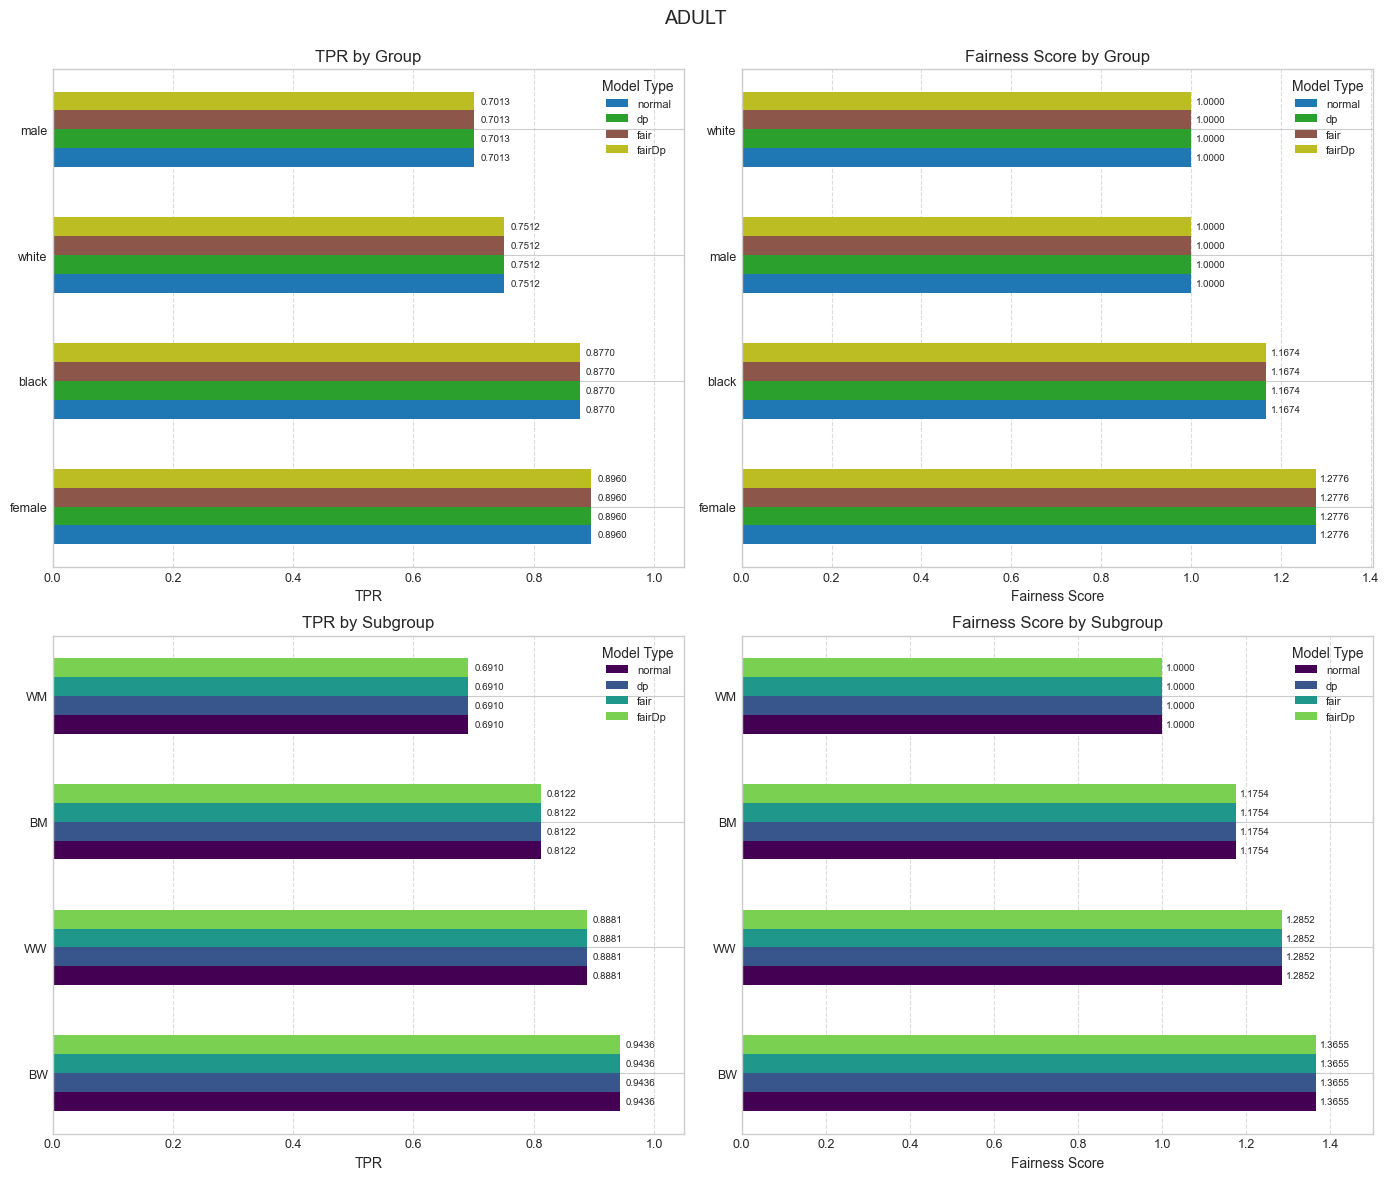

In [15]:
datasets = ["dia_inde", "dia_redi", "adult", "bank", "credit", "kdd", "law"]

create_dataset_plots("adult")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

def create_dataset_plots(path_type,file_path=None):
    df = pd.read_csv(file_path)
    dataset_name = "PUMS"
    
    df = df[df['path_type'] == path_type]
    
    group_df = df[df['data_type'] == 'group']
    subgroup_df = df[df['data_type'] == 'subgroup']
    
    available_model_types = df['model_type'].unique()
    model_types = [mt for mt in ['normal', 'dp', 'fair', 'fairDp'] if mt in available_model_types]
    group_splits = group_df['split'].unique()
    subgroup_splits = subgroup_df['split'].unique()
    
    fig, axs = plt.subplots(2, 2, figsize=(14, 12))
    
    bar_height = 0.15
    
    y_position_offset = np.linspace(-(len(model_types)-1)/2*bar_height, (len(model_types)-1)/2*bar_height, len(model_types))
    
    tpr_by_split_model = {}
    for split in group_splits:
        tpr_by_split_model[split] = []
        for model_type in model_types:
            tpr_values = group_df[(group_df['split'] == split) & (group_df['model_type'] == model_type)]['tpr']
            tpr_by_split_model[split].append(tpr_values.mean() if len(tpr_values) > 0 else 0)
    
    avg_tpr_by_split = {split: np.mean(values) for split, values in tpr_by_split_model.items()}
    sorted_splits = sorted(group_splits, key=lambda x: avg_tpr_by_split[x], reverse=True)
    
    colors = plt.cm.tab10(np.linspace(0, 0.8, len(model_types)))
    
    for i, model_type in enumerate(model_types):
        y_positions = np.arange(len(sorted_splits)) + y_position_offset[i]
        values = [group_df[(group_df['split'] == split) & (group_df['model_type'] == model_type)]['tpr'].mean() 
                 for split in sorted_splits]
        
        bars = axs[0, 0].barh(y_positions, values, height=bar_height, color=colors[i], label=model_type)
        
        for j, value in enumerate(values):
            axs[0, 0].text(value + 0.01, y_positions[j], f"{value:.4f}", va='center', fontsize=7)
    
    axs[0, 0].set_yticks(np.arange(len(sorted_splits)))
    axs[0, 0].set_yticklabels(sorted_splits)
    axs[0, 0].set_xlabel('TPR', fontsize=10)
    axs[0, 0].set_title(f'TPR by Group', fontsize=12)
    axs[0, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[0, 0].set_xlim(0, 1.05)
    axs[0, 0].tick_params(axis='both', which='major', labelsize=9)
    axs[0, 0].legend(title="Model Type", fontsize=8)
    
    fairness_by_split_model = {}
    for split in group_splits:
        fairness_by_split_model[split] = []
        for model_type in model_types:
            fair_values = group_df[(group_df['split'] == split) & (group_df['model_type'] == model_type)]['fairness_score']
            fairness_by_split_model[split].append(fair_values.mean() if len(fair_values) > 0 else 0)
    
    avg_fair_by_split = {split: np.mean(values) for split, values in fairness_by_split_model.items()}
    sorted_splits = sorted(group_splits, key=lambda x: avg_fair_by_split[x], reverse=True)
    
    for i, model_type in enumerate(model_types):
        y_positions = np.arange(len(sorted_splits)) + y_position_offset[i]
        values = [group_df[(group_df['split'] == split) & (group_df['model_type'] == model_type)]['fairness_score'].mean() 
                 for split in sorted_splits]
        
        bars = axs[0, 1].barh(y_positions, values, height=bar_height, color=colors[i], label=model_type)
        
        for j, value in enumerate(values):
            axs[0, 1].text(value + 0.01, y_positions[j], f"{value:.4f}", va='center', fontsize=7)
    
    axs[0, 1].set_yticks(np.arange(len(sorted_splits)))
    axs[0, 1].set_yticklabels(sorted_splits)
    axs[0, 1].set_xlabel('Fairness Score', fontsize=10)
    axs[0, 1].set_title(f'Fairness Score by Group', fontsize=12)
    axs[0, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[0, 1].tick_params(axis='both', which='major', labelsize=9)
    
    max_fair = max([max(values) for values in fairness_by_split_model.values()]) * 1.1
    axs[0, 1].set_xlim(0, max_fair)
    axs[0, 1].legend(title="Model Type", fontsize=8)
    
    tpr_by_split_model = {}
    for split in subgroup_splits:
        tpr_by_split_model[split] = []
        for model_type in model_types:
            tpr_values = subgroup_df[(subgroup_df['split'] == split) & (subgroup_df['model_type'] == model_type)]['tpr']
            tpr_by_split_model[split].append(tpr_values.mean() if len(tpr_values) > 0 else 0)
    
    avg_tpr_by_split = {split: np.mean(values) for split, values in tpr_by_split_model.items()}
    sorted_splits = sorted(subgroup_splits, key=lambda x: avg_tpr_by_split[x], reverse=True)
    
    colors = plt.cm.viridis(np.linspace(0, 0.8, len(model_types)))
    
    for i, model_type in enumerate(model_types):
        y_positions = np.arange(len(sorted_splits)) + y_position_offset[i]
        values = [subgroup_df[(subgroup_df['split'] == split) & (subgroup_df['model_type'] == model_type)]['tpr'].mean() 
                 for split in sorted_splits]
        
        bars = axs[1, 0].barh(y_positions, values, height=bar_height, color=colors[i], label=model_type)
        
        for j, value in enumerate(values):
            axs[1, 0].text(value + 0.01, y_positions[j], f"{value:.4f}", va='center', fontsize=7)
    
    axs[1, 0].set_yticks(np.arange(len(sorted_splits)))
    axs[1, 0].set_yticklabels(sorted_splits)
    axs[1, 0].set_xlabel('TPR', fontsize=10)
    axs[1, 0].set_title(f'TPR by Subgroup', fontsize=12)
    axs[1, 0].grid(axis='x', linestyle='--', alpha=0.7)
    axs[1, 0].set_xlim(0, 1.05)
    axs[1, 0].tick_params(axis='both', which='major', labelsize=9)
    axs[1, 0].legend(title="Model Type", fontsize=8)
    
    fairness_by_split_model = {}
    for split in subgroup_splits:
        fairness_by_split_model[split] = []
        for model_type in model_types:
            fair_values = subgroup_df[(subgroup_df['split'] == split) & (subgroup_df['model_type'] == model_type)]['fairness_score']
            fairness_by_split_model[split].append(fair_values.mean() if len(fair_values) > 0 else 0)
    
    avg_fair_by_split = {split: np.mean(values) for split, values in fairness_by_split_model.items()}
    sorted_splits = sorted(subgroup_splits, key=lambda x: avg_fair_by_split[x], reverse=True)
    
    for i, model_type in enumerate(model_types):
        y_positions = np.arange(len(sorted_splits)) + y_position_offset[i]
        values = [subgroup_df[(subgroup_df['split'] == split) & (subgroup_df['model_type'] == model_type)]['fairness_score'].mean() 
                 for split in sorted_splits]
        
        bars = axs[1, 1].barh(y_positions, values, height=bar_height, color=colors[i], label=model_type)
        
        for j, value in enumerate(values):
            axs[1, 1].text(value + 0.01, y_positions[j], f"{value:.4f}", va='center', fontsize=7)
    
    axs[1, 1].set_yticks(np.arange(len(sorted_splits)))
    axs[1, 1].set_yticklabels(sorted_splits)
    axs[1, 1].set_xlabel('Fairness Score', fontsize=10)
    axs[1, 1].set_title(f'Fairness Score by Subgroup', fontsize=12)
    axs[1, 1].grid(axis='x', linestyle='--', alpha=0.7)
    axs[1, 1].tick_params(axis='both', which='major', labelsize=9)
    
    max_fair = max([max(values) for values in fairness_by_split_model.values()]) * 1.1
    axs[1, 1].set_xlim(0, max_fair)
    axs[1, 1].legend(title="Model Type", fontsize=8)
    
    plt.tight_layout()
    plt.suptitle(f'{dataset_name.upper()} - {path_type}', fontsize=14, y=0.98)
    plt.subplots_adjust(top=0.93)
    plt.show()

In [17]:
# df1 = pd.read_csv(r"D:\Download\python_projects\tableak_adult_gen\all_exp_result\fairness_scores_PUMS.csv")
# pd.unique(df1["path_type"])

In [18]:
# temp_df = pd.read_csv(file_path_pums)
# temp_df[
#     (temp_df["model_type"] == "normal") &
#     (temp_df["split"] == "male") &
#     (temp_df["path_type"] == "with_pre_trained")
# ].reset_index(drop=True)



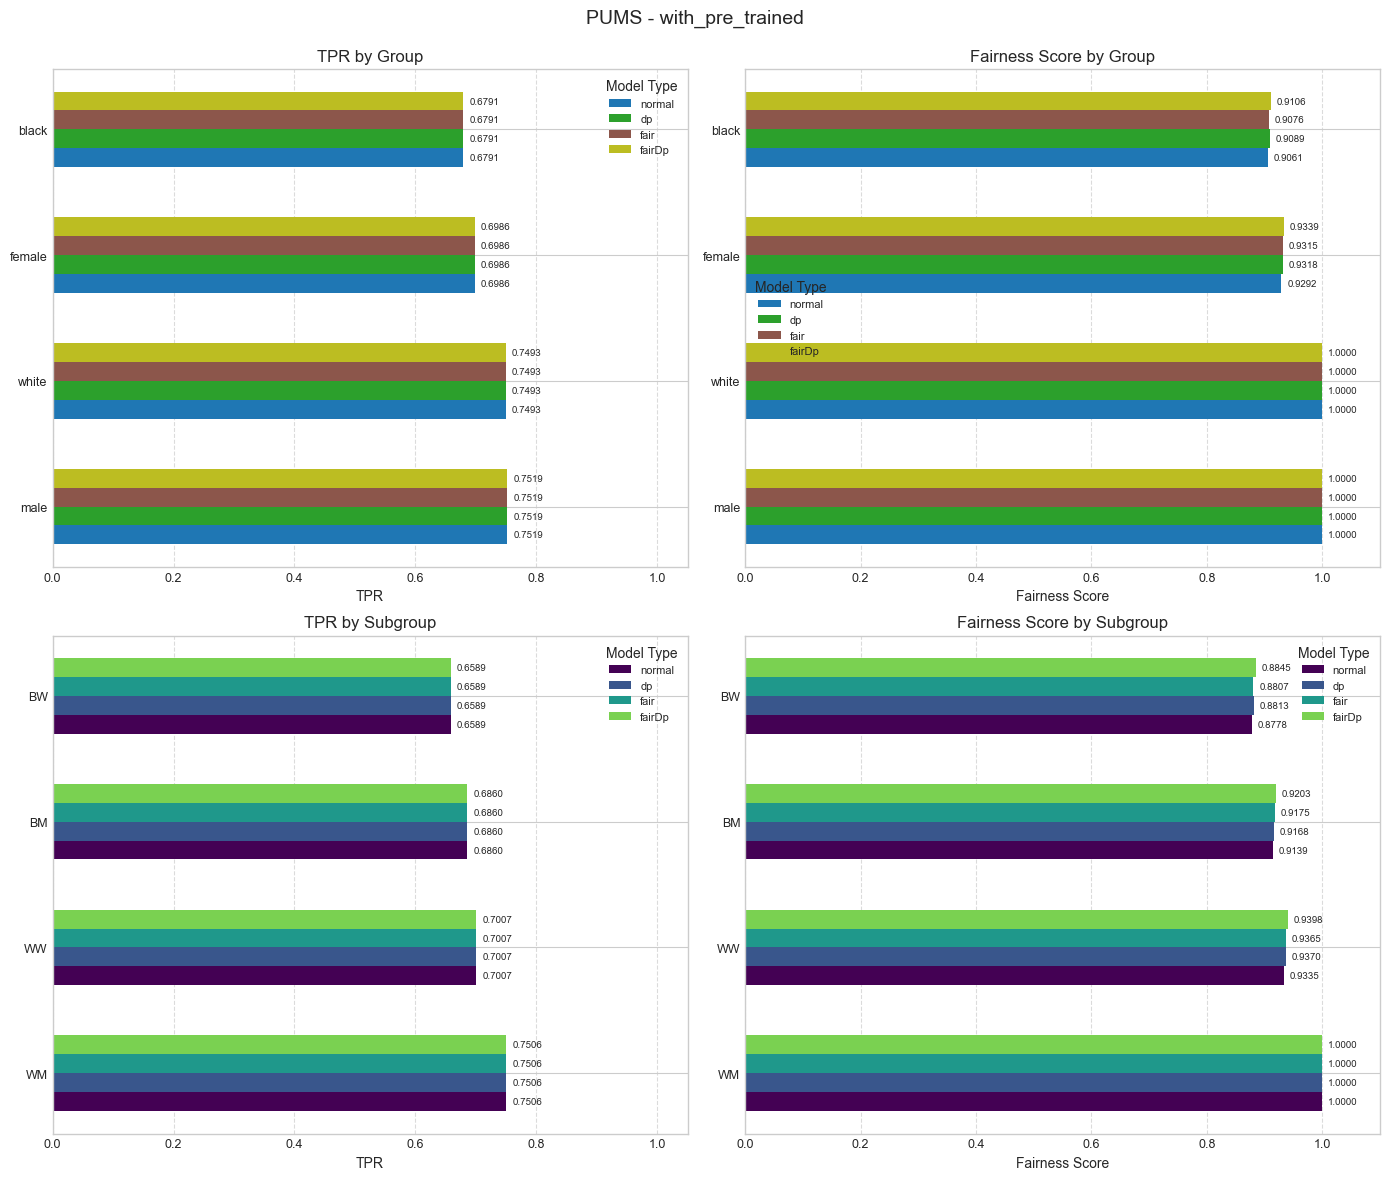

In [19]:
file_path_pums=r"D:\data\Download\python_projects\tableak_adult_gen\all_exp_result\fairness_scores_PUMS.csv"

file_path_pums_qat=r"D:\data\Download\python_projects\tableak_adult_gen\all_exp_result\fairness_scores_qat_PUMS.csv"

create_dataset_plots("with_pre_trained",file_path_pums_qat)
# create_dataset_plots("without_pre_trained",file_path_pums_qat)